In [1]:
from utils import *
x = np.linspace(-1, 1, 500)
t = np.linspace(0, 1, 2000)
U = np.load('trained_models/burgers_analytical_solution.npy')

In [2]:
def u0_burgers(x):
    return -np.sin(np.pi*x)

def u0_riemann(x):
    return np.where(x < 0, 1.0, -1.0)

u0_1 = u0_burgers(x)
u0_2 = u0_riemann(x)

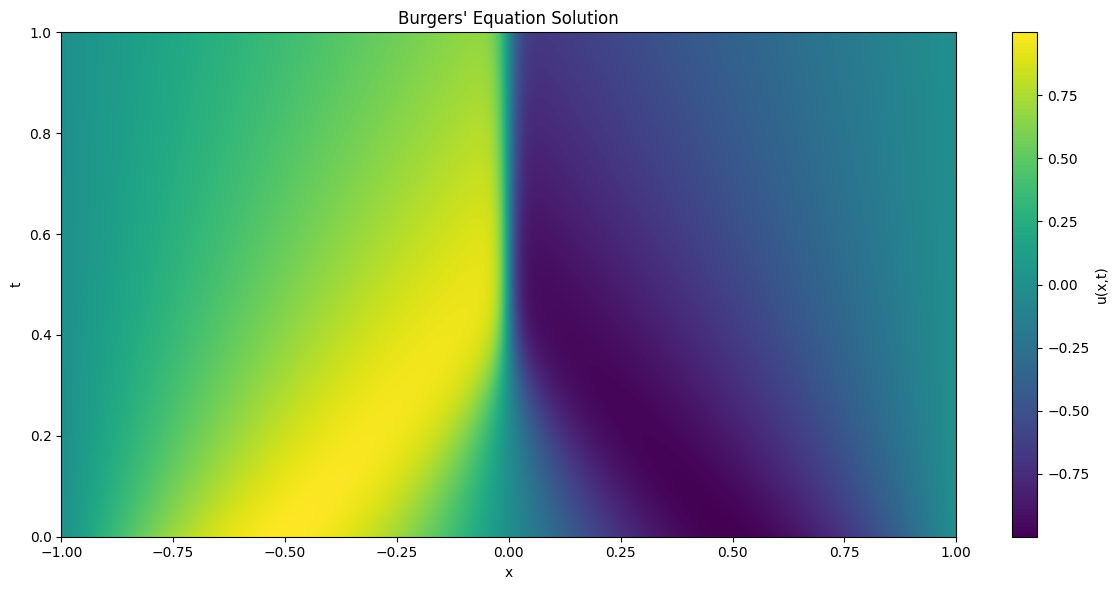

In [3]:
r = RusanovBurgersSolver(u0_1,x, t)
r.solve()
r.plot()

# CALORE

In [4]:
def u0_heat(x):
    return np.sin(np.pi*x)

import numpy as np

def real_solution_heat(x, t, alpha):
    X, T = np.meshgrid(x, t, indexing='xy')
    U = np.exp(-alpha * np.pi**2 * T) * np.sin(np.pi * X)

    return U

u0 = u0_heat(x = np.linspace(0, 1, 500))
real_sol = real_solution_heat(x = np.linspace(0, 1, 500), t = np.linspace(0, 1, 2000), alpha = 0.1)

In [5]:
heat = ProblemSetUp(
    u0=u0,
    x = np.linspace(0, 1, 500),
    t = np.linspace(0, 1, 2000),
    layers=[2,50,50,50,1],
    epochs=5000,
    nu=0.1,
    equation='heat',
    real_solution=real_sol,
    model='pinn',
    path='trained_models/heat_model.pth',
)

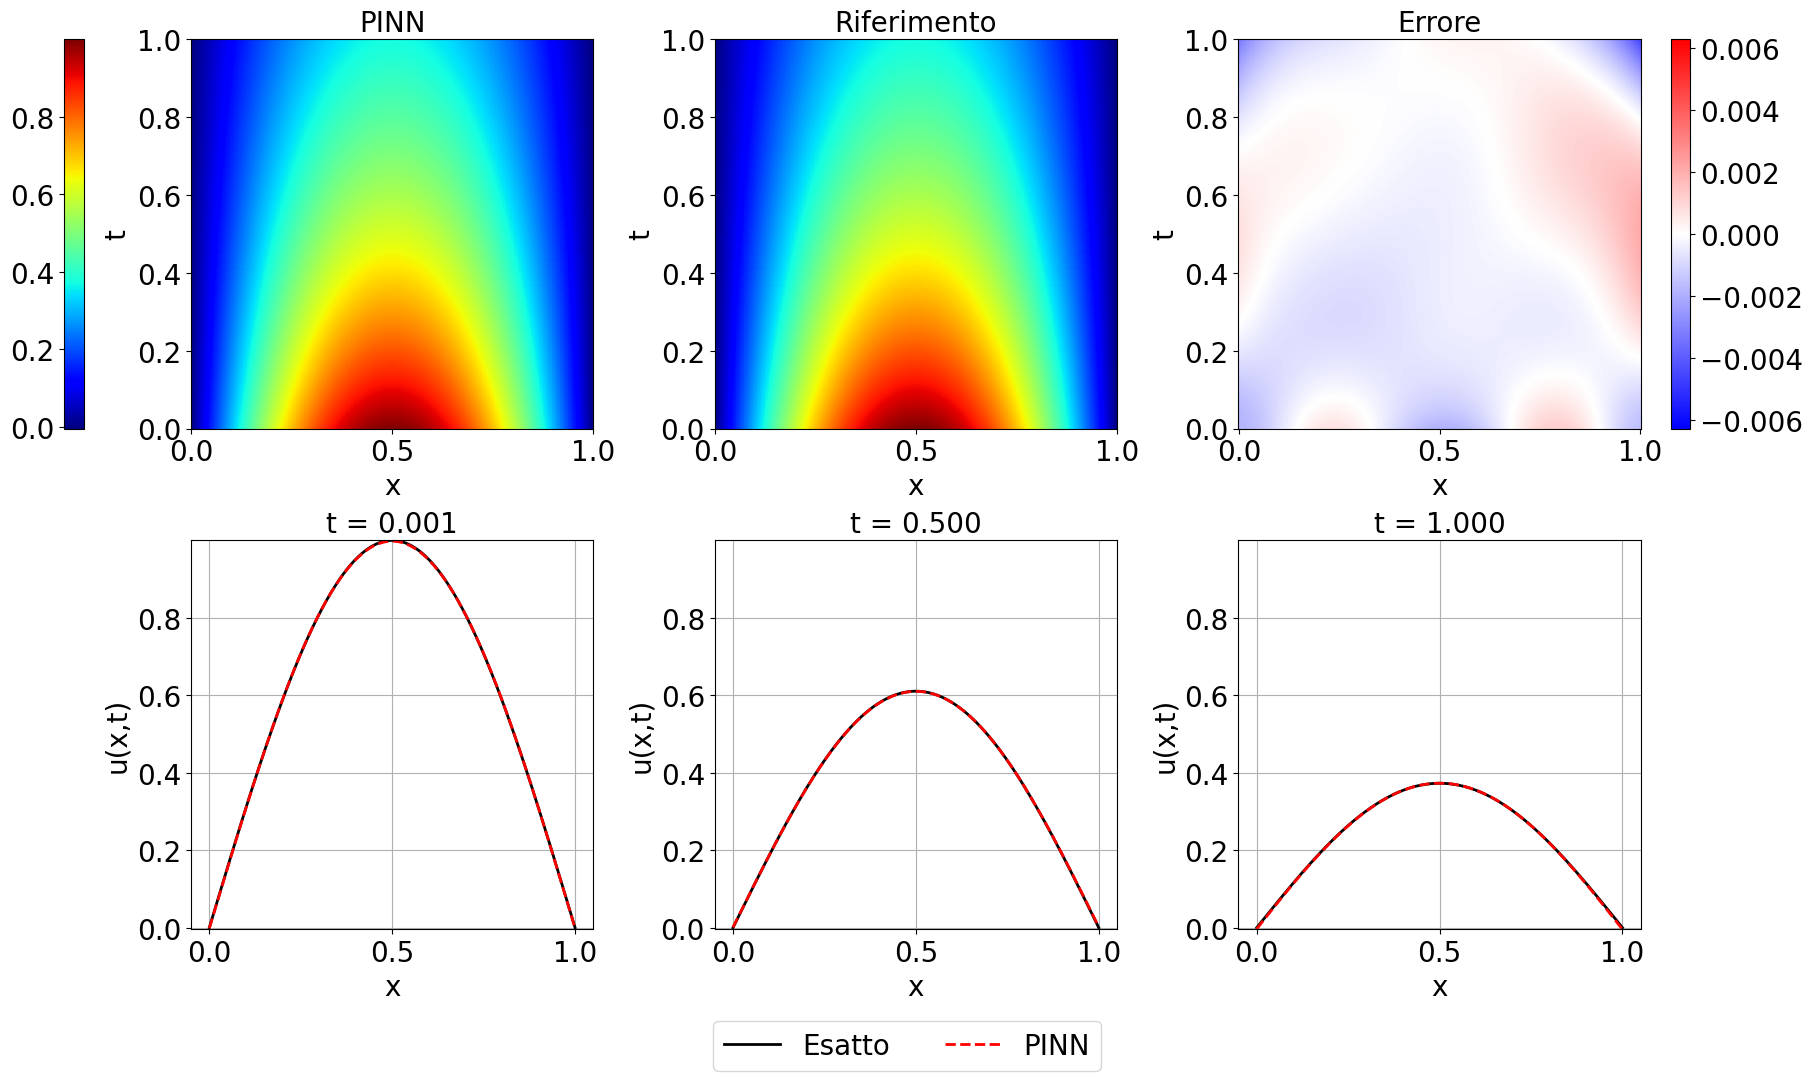

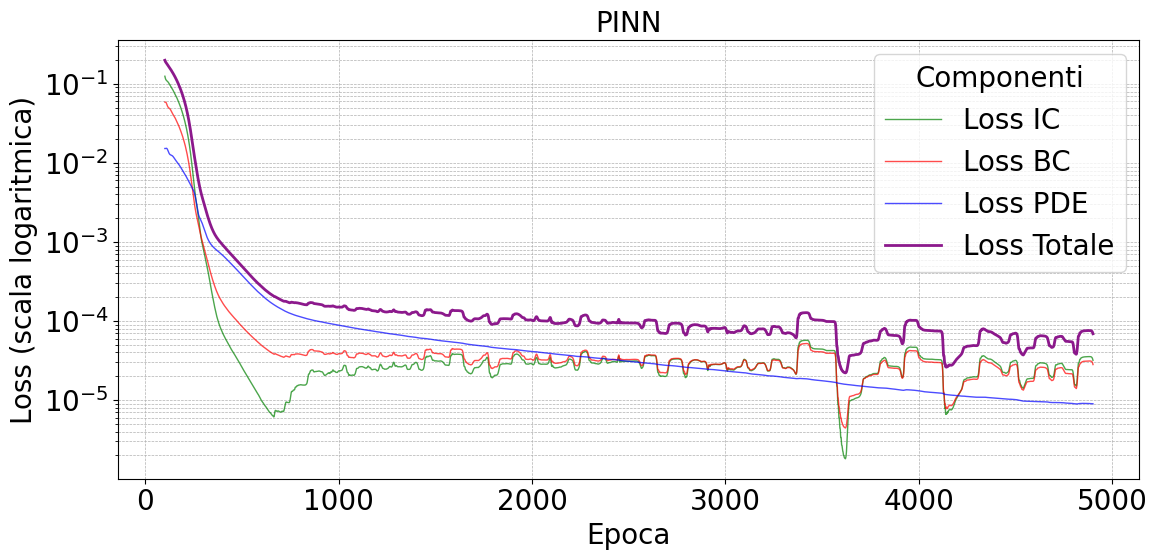


Metriche di Errore L2
---------------------
Errore L2 assoluto            : 6.615052e-04
Errore L2 relativo            : 1.415948e-03



In [6]:
heat.plot_comparison()
heat.plot_losses()
heat.l2_error()

# BURGERS VISCOSO

In [7]:
burgers_1 = ProblemSetUp(
    u0=u0_1,
    x=np.linspace(-1, 1, 500),
    t=np.linspace(0, 1, 2000),
    layers=[2,50,50,50,1],
    epochs=20000,
    nu=0.01,
    equation='burgers',
    #real_solution=U,
    model='pinn',
    path='trained_models/burgers_viscid_1_finale.pth'
)

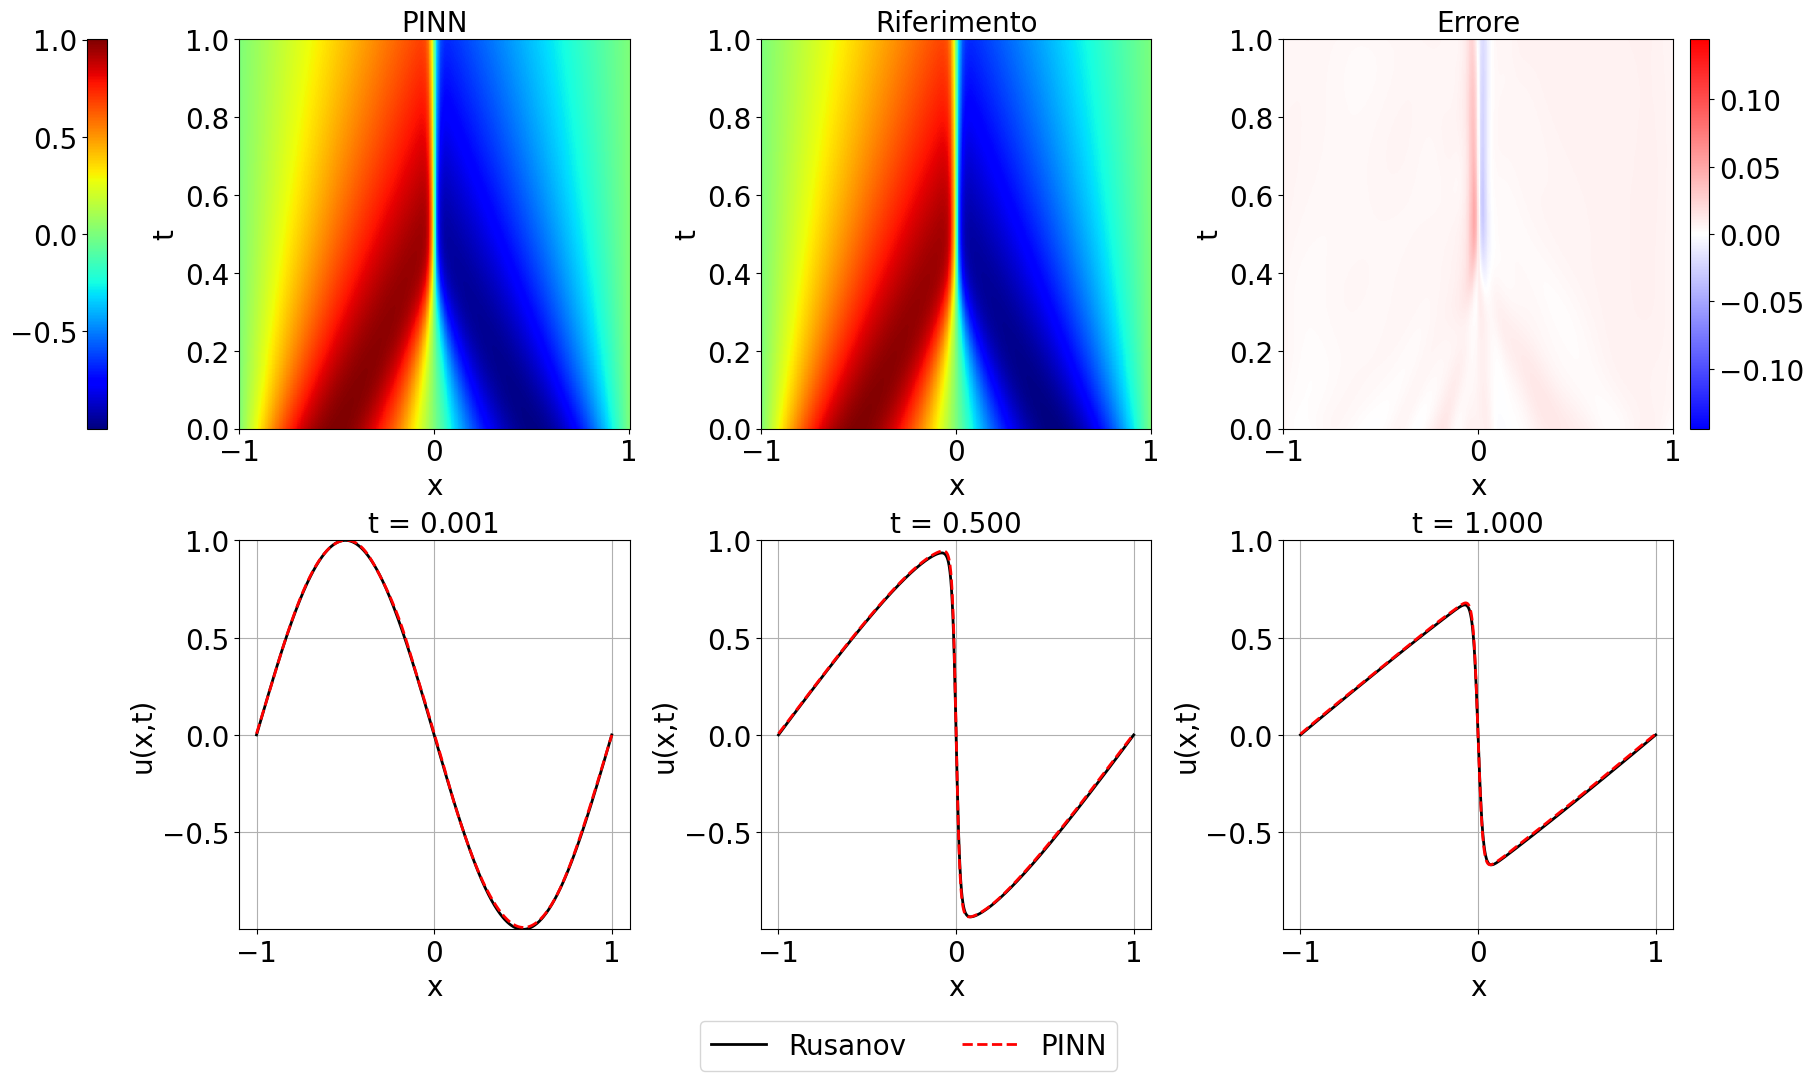

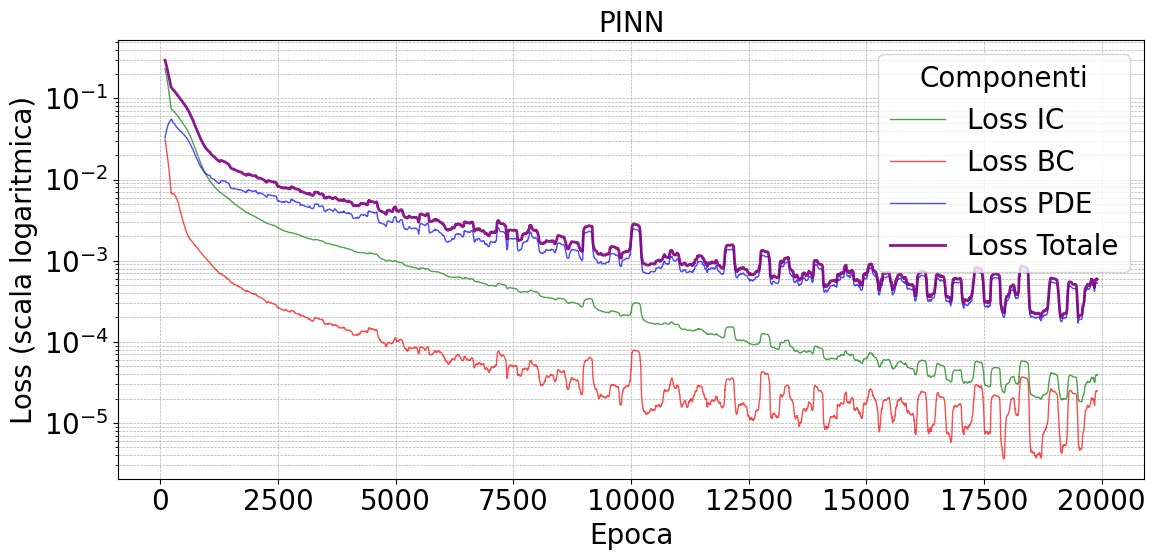


Metriche di Errore L2
---------------------
Errore L2 assoluto            : 1.005803e-02
Errore L2 relativo            : 1.188562e-02



In [8]:
burgers_1.plot_comparison()
burgers_1.plot_losses()
burgers_1.l2_error()

In [9]:
burgers_2 = ProblemSetUp(
    u0=u0_2,
    x=x,
    t=t,
    layers=[2,50,50,50,1],
    epochs=20000,
    N=(2500, 500, 5000),
    nu=0.01,
    equation='burgers',
    model='pinn',
    path='trained_models/burgers_viscid_2_finale.pth'
)

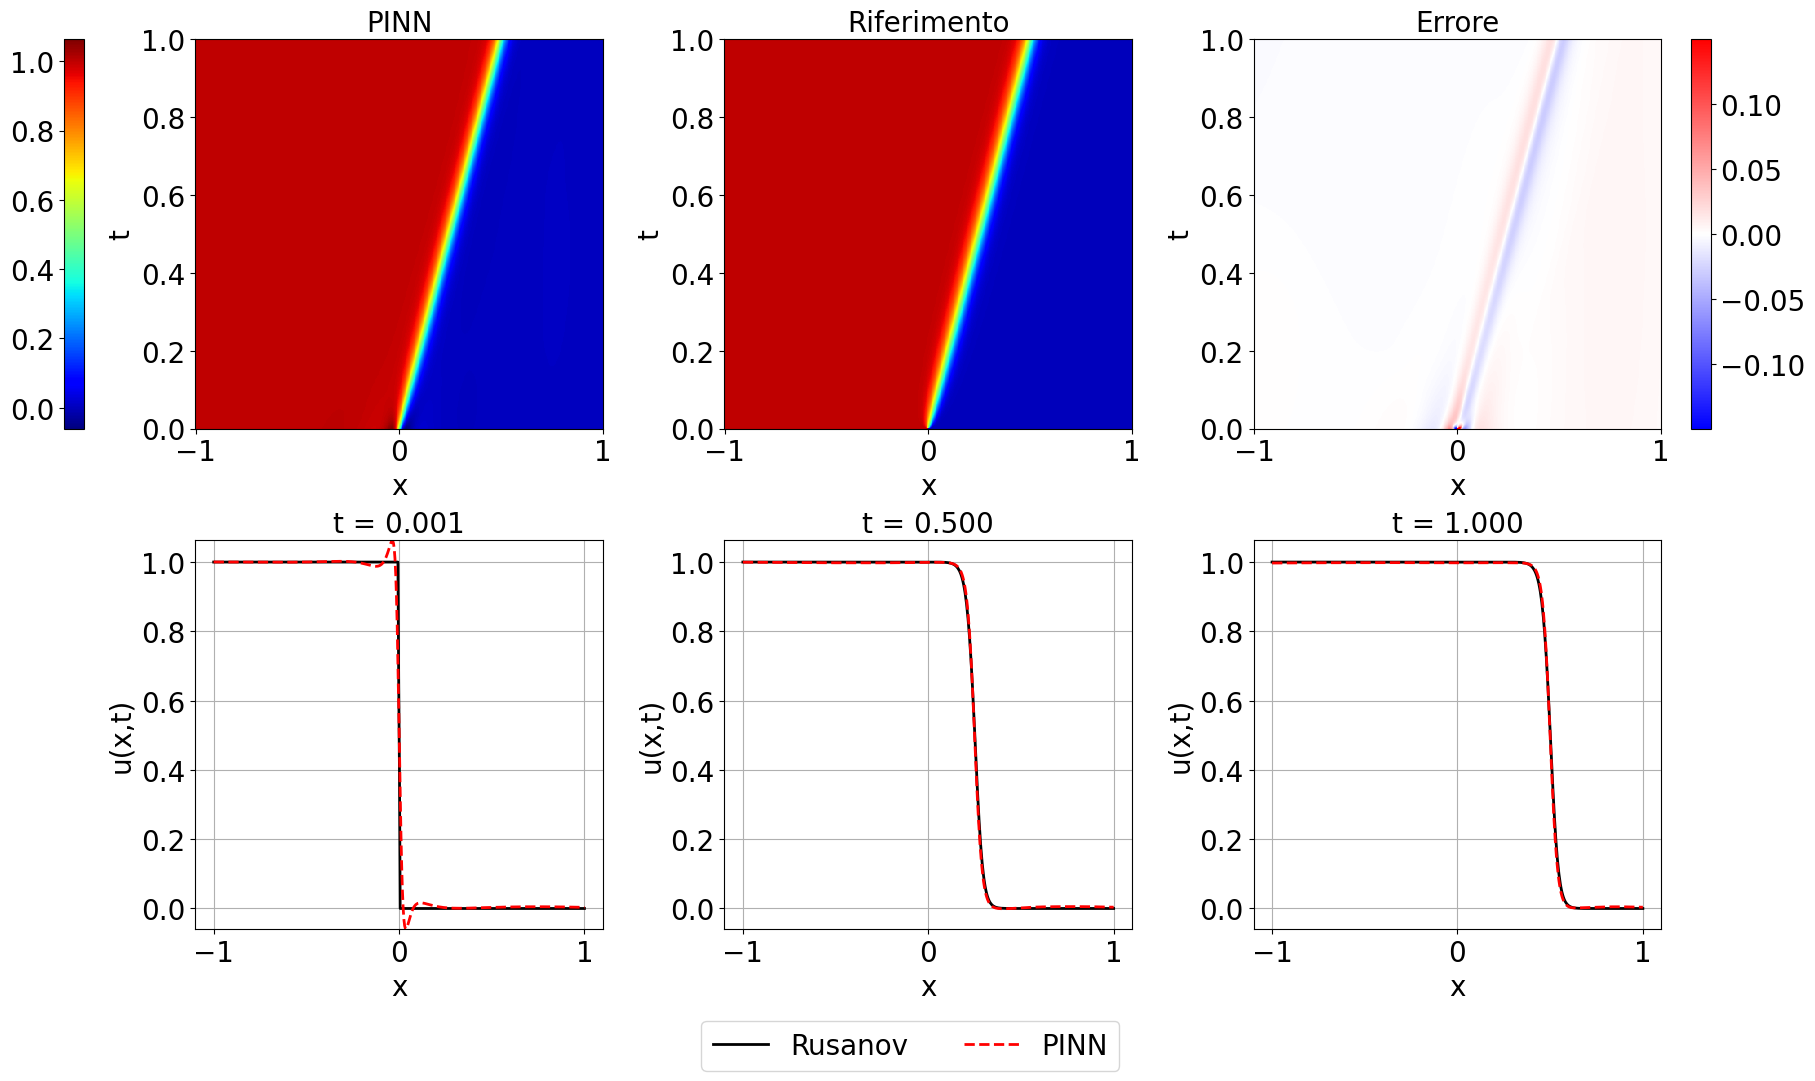

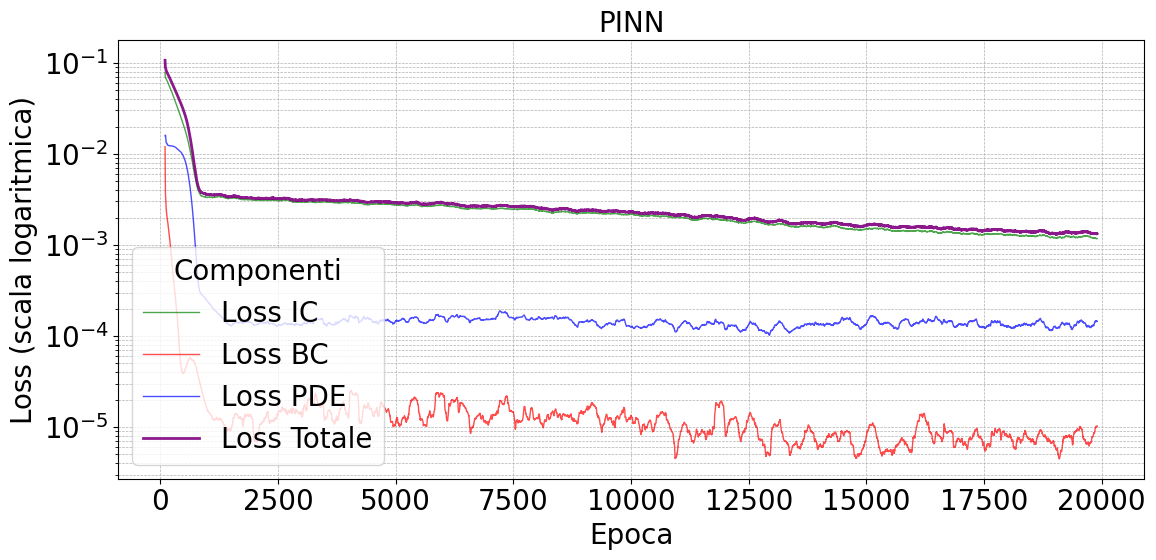


Metriche di Errore L2
---------------------
Errore L2 assoluto            : 7.776165e-03
Errore L2 relativo            : 7.005467e-03



In [10]:
burgers_2.plot_comparison()
burgers_2.plot_losses()
burgers_2.l2_error()

# BURGERS NON VISCOSO

In [11]:
inburgers_1 = ProblemSetUp(
    u0=u0_1,
    x=x,
    t=t,
    layers=[2,50,50,50,1],
    epochs=20000,
    nu=0,
    equation='burgers',
    model='pinn',
    path='trained_models/pinn_burgers_inviscid_1_finale.pth'
)

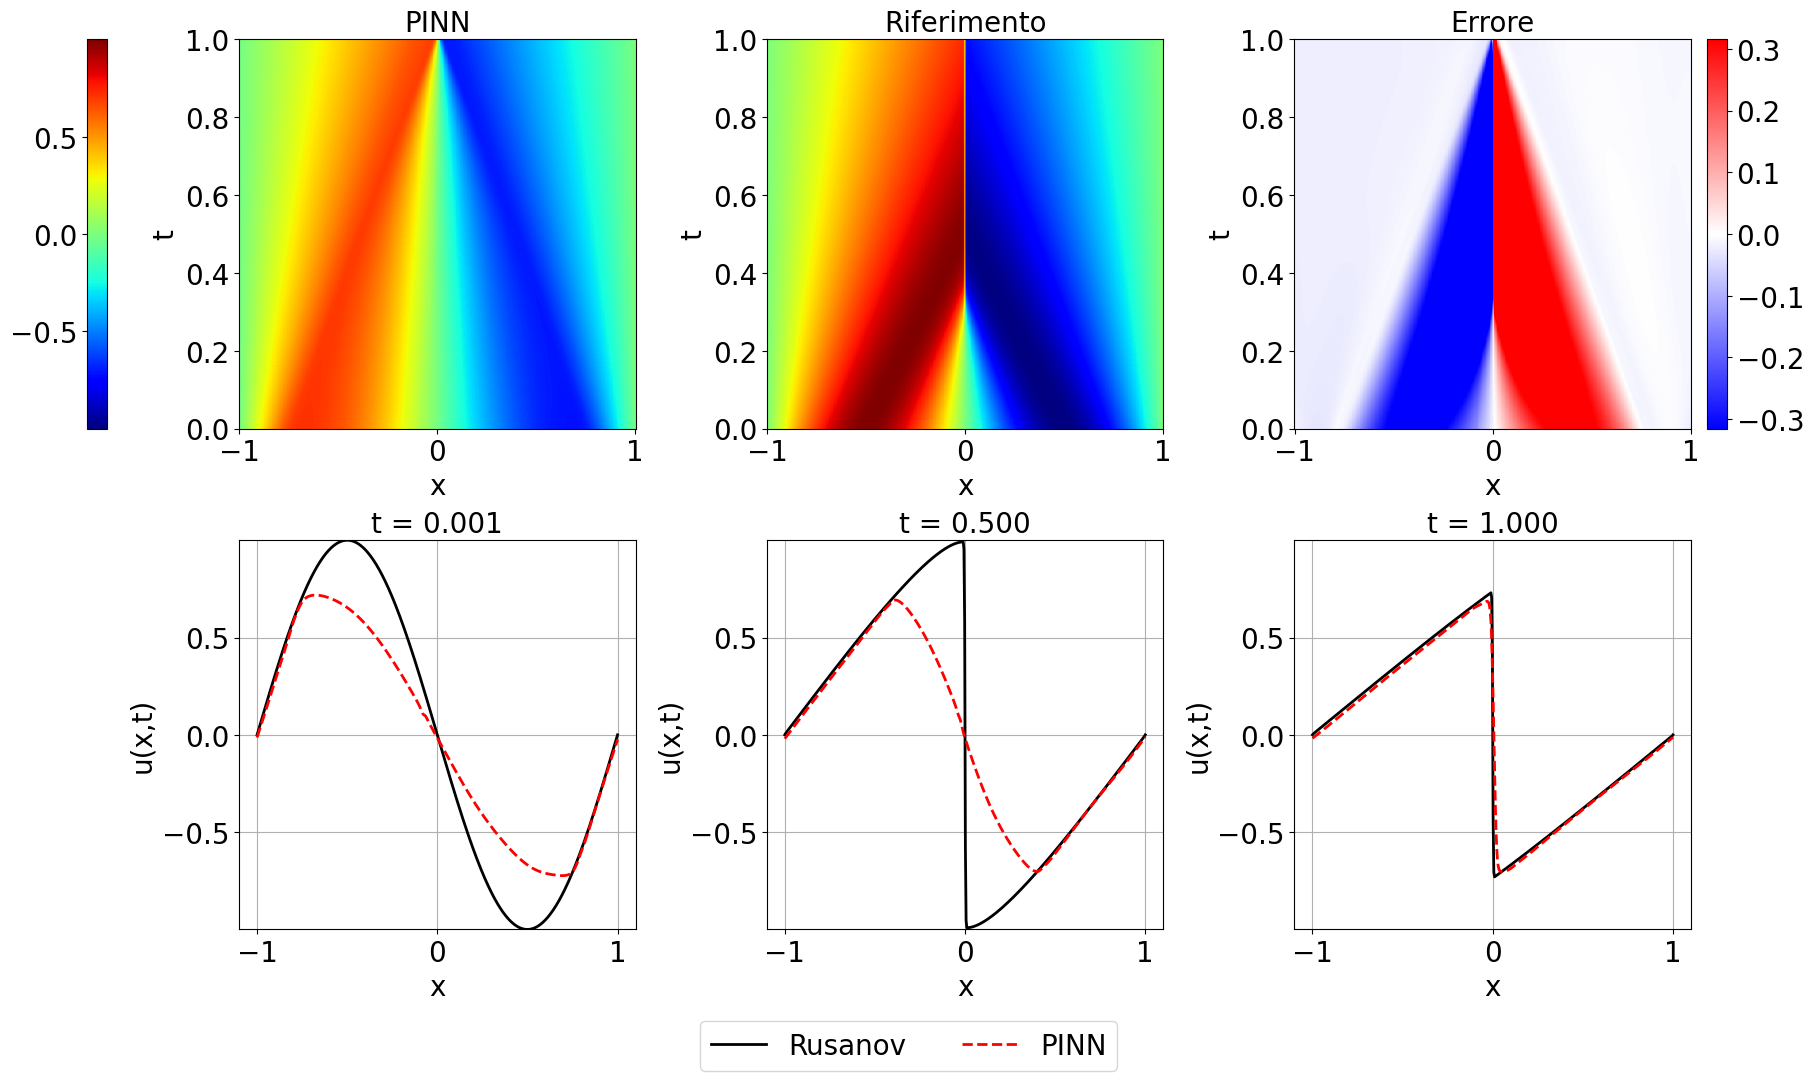

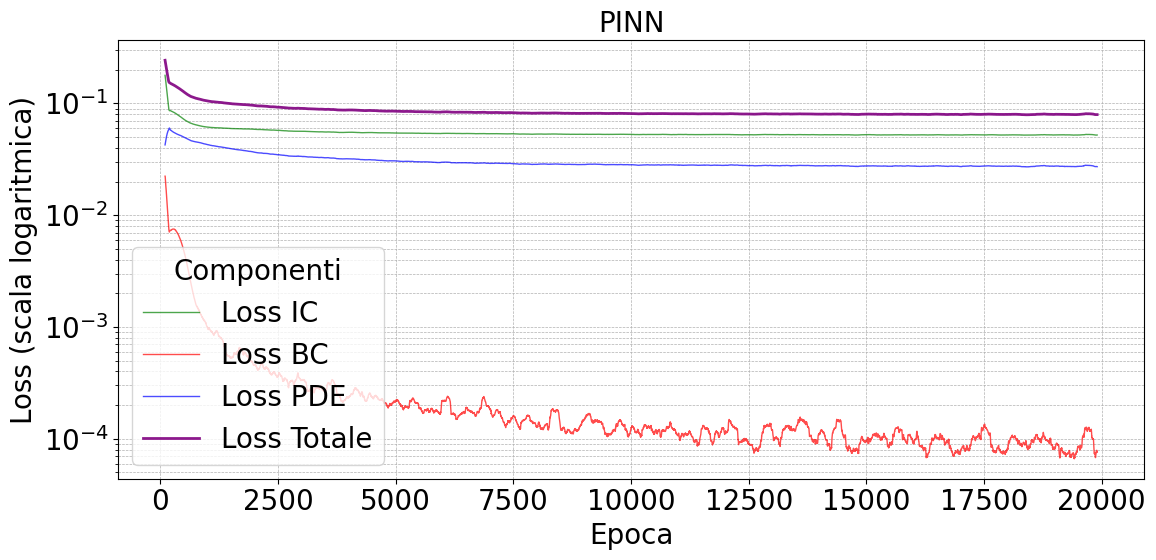


Metriche di Errore L2
---------------------
Errore L2 assoluto            : 3.850276e-01
Errore L2 relativo            : 4.395972e-01



In [12]:
inburgers_1.plot_comparison()
inburgers_1.plot_losses()
inburgers_1.l2_error()

In [3]:
inburgers_2 = ProblemSetUp(
    u0=u0_2,
    x=x,
    t=t,
    layers=[2,50,50,50,1],
    epochs=20000,
    nu=0,
    equation='burgers',
    model='pinn',
    # path='trained_models/pinn_burgers_inviscid_2_finale.pth'
)

c:\Users\frmar\OneDrive\Desktop\GitHub\PINNs\PINNs\Lib\site-packages\torch\autograd\graph.py:823: UserWarning: Attempting to run cuBLAS, but there was no current CUDA context! Attempting to set the primary context... (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\cuda\CublasHandlePool.cpp:180.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


PINN: [ 2000/20000] | Loss=2.432e-01 | PDE=7.122e-02 | BC=2.802e-04 | IC=1.717e-01
PINN: [ 4000/20000] | Loss=2.384e-01 | PDE=6.896e-02 | BC=1.487e-04 | IC=1.693e-01
PINN: [ 6000/20000] | Loss=2.331e-01 | PDE=6.685e-02 | BC=1.082e-04 | IC=1.661e-01
PINN: [ 8000/20000] | Loss=2.472e-01 | PDE=7.172e-02 | BC=6.164e-05 | IC=1.755e-01
PINN: [10000/20000] | Loss=2.320e-01 | PDE=6.788e-02 | BC=3.582e-05 | IC=1.641e-01
PINN: [12000/20000] | Loss=2.398e-01 | PDE=5.677e-02 | BC=1.488e-04 | IC=1.829e-01
PINN: [14000/20000] | Loss=2.273e-01 | PDE=7.269e-02 | BC=6.514e-05 | IC=1.546e-01
PINN: [16000/20000] | Loss=2.369e-01 | PDE=6.662e-02 | BC=3.754e-05 | IC=1.702e-01
PINN: [18000/20000] | Loss=2.290e-01 | PDE=6.592e-02 | BC=2.330e-05 | IC=1.631e-01
PINN: [20000/20000] | Loss=2.357e-01 | PDE=6.978e-02 | BC=1.602e-05 | IC=1.659e-01


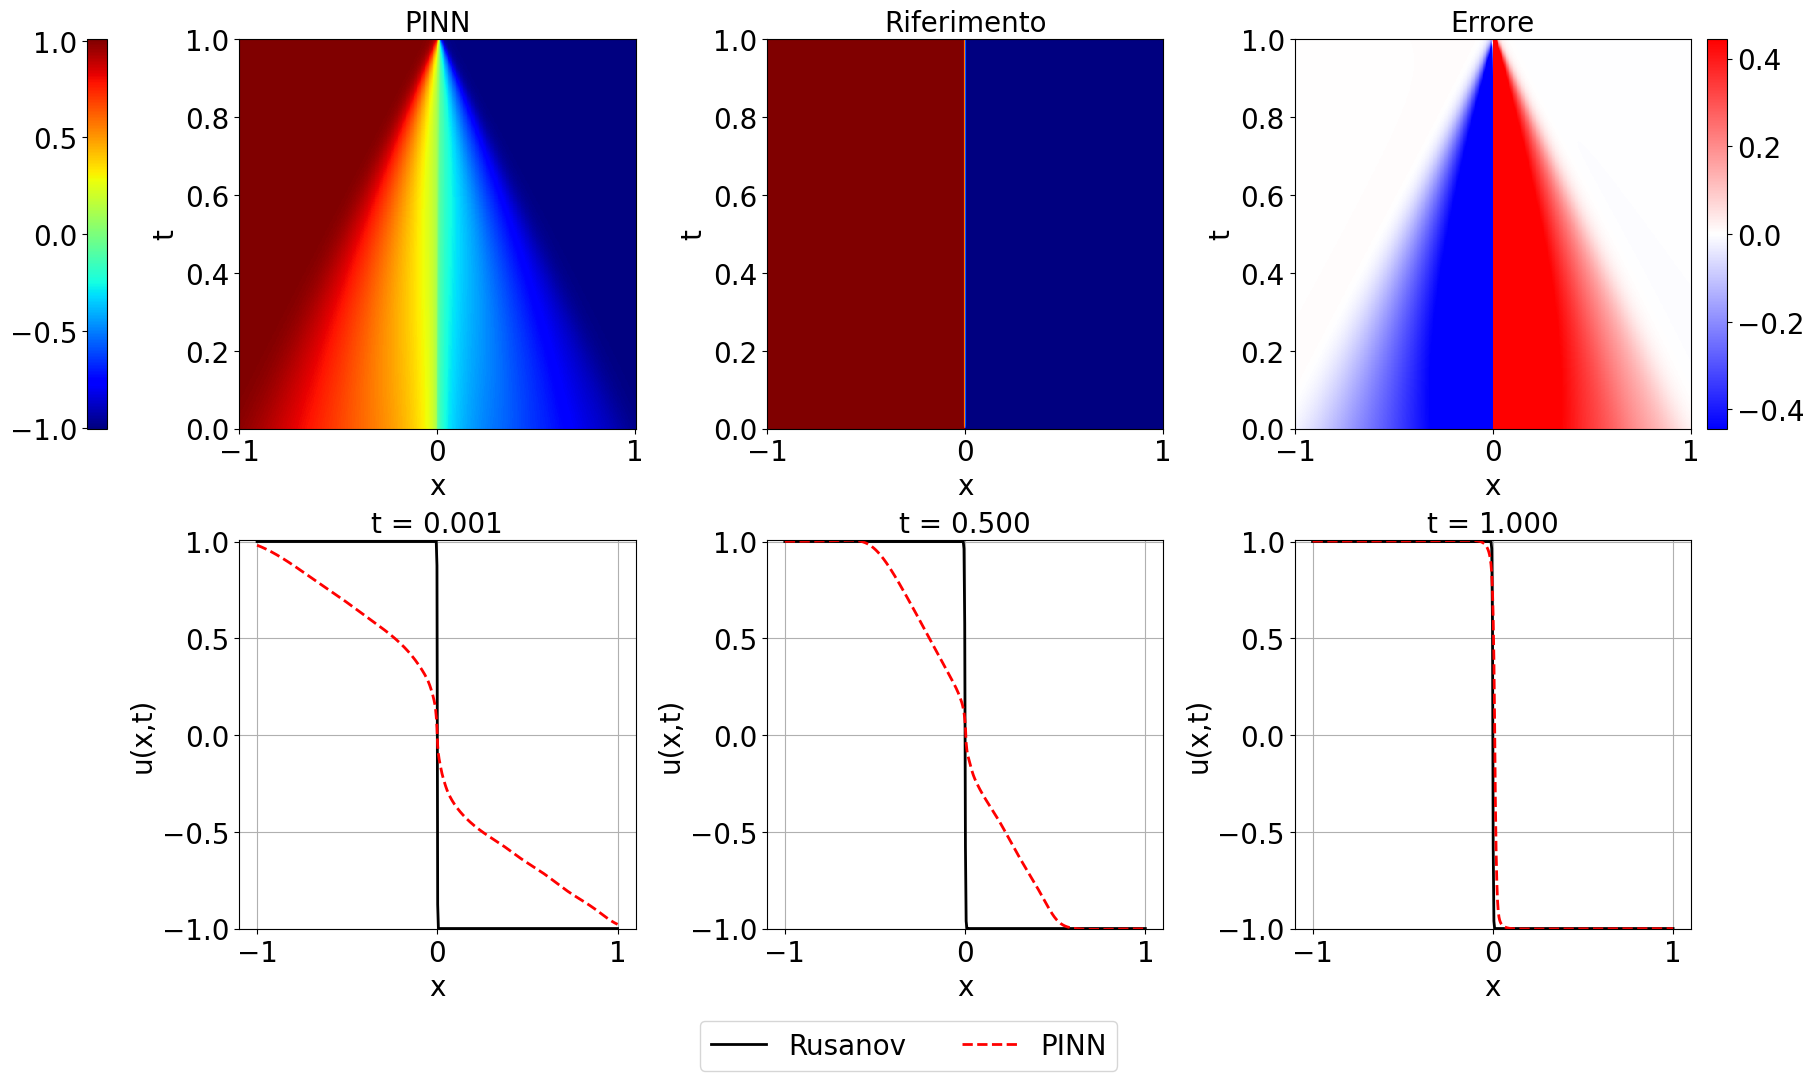

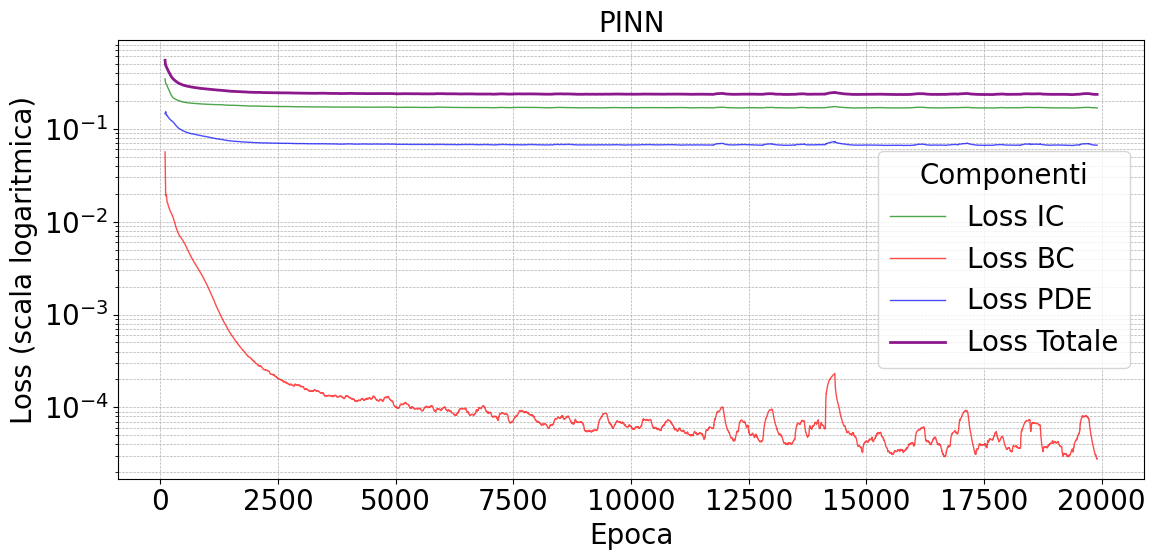


Metriche di Errore L2
---------------------
Errore L2 assoluto            : 4.685955e-01
Errore L2 relativo            : 3.314234e-01



In [4]:
inburgers_2.plot_comparison()
inburgers_2.plot_losses()
inburgers_2.l2_error()

# wPINN BURGERS NON VISCOSO

In [15]:
w_inburgers_1 = ProblemSetUp(
    u0=u0_1,
    x=x,
    t=t,
    layers=[2,50,50,50,1],
    epochs=20000,
    nu=0,
    model='wpinn',
    path='trained_models/wpinn_burgers_inviscid_1_finale.pth'
)

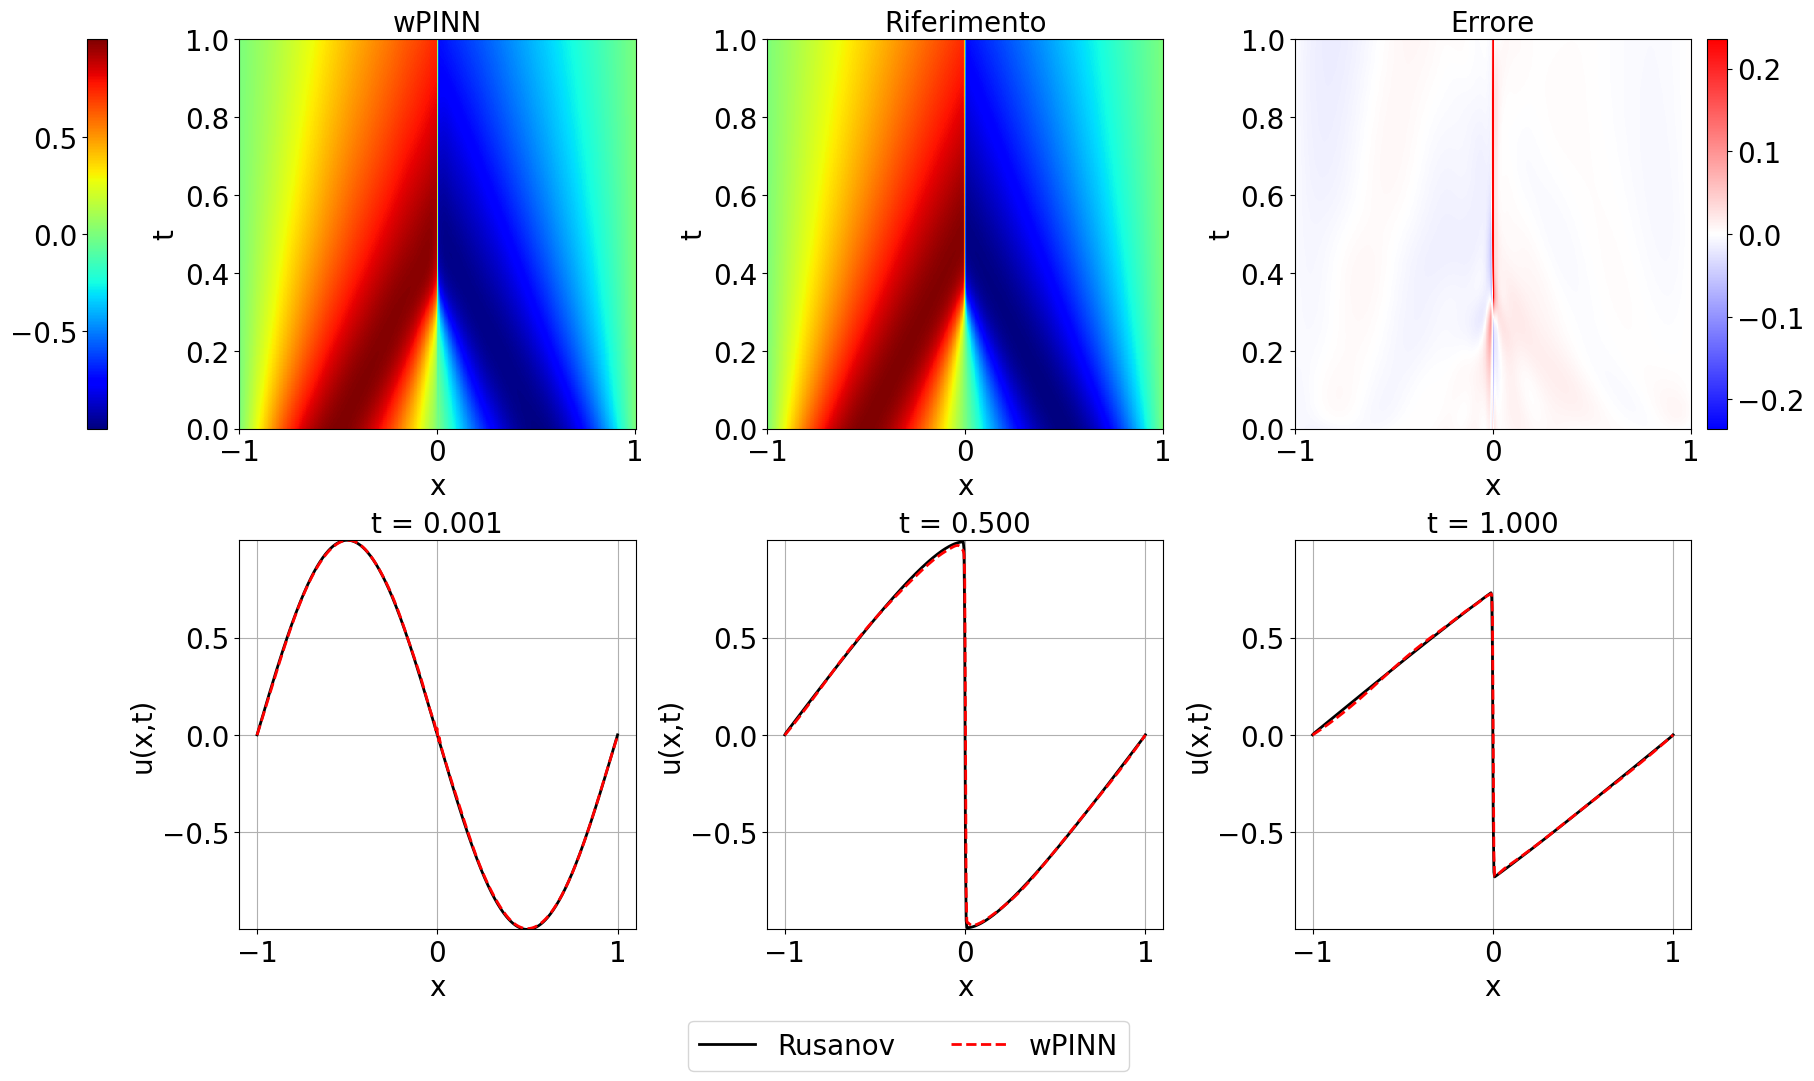

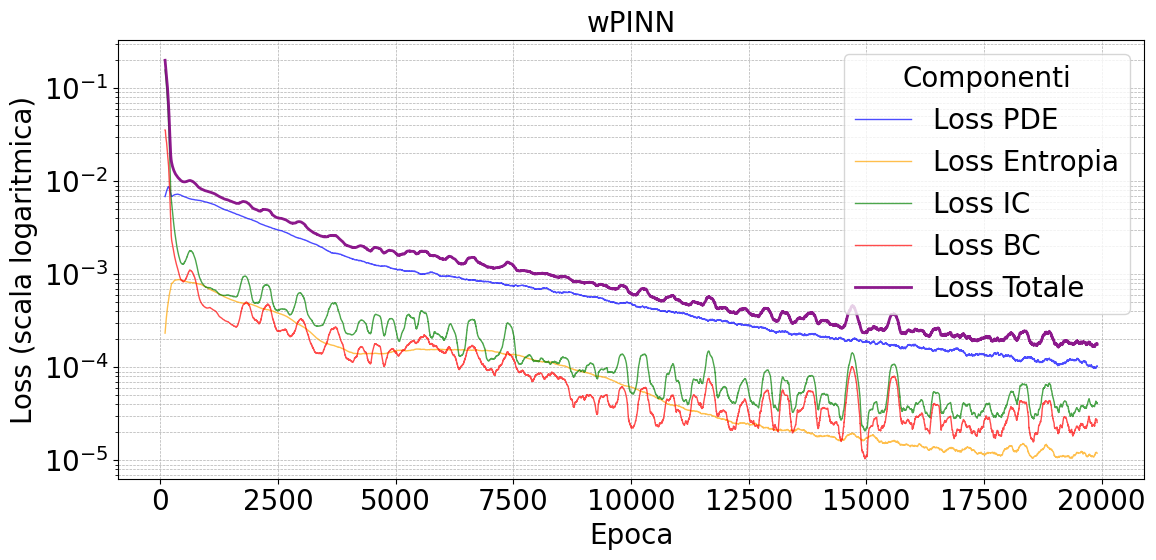


Metriche di Errore L2
---------------------
Errore L2 assoluto            : 3.452821e-02
Errore L2 relativo            : 3.942186e-02



In [16]:
w_inburgers_1.plot_comparison()
w_inburgers_1.plot_losses()
w_inburgers_1.l2_error()

In [17]:
w_inburgers_2 = ProblemSetUp(
    u0=u0_2,
    x=x,
    t=t,
    layers=[2,50,50,50,1],
    epochs=20000,
    nu=0,
    equation='burgers',
    model='wpinn',
    path='trained_models/wpinn_burgers_inviscid_2_finale.pth'
)

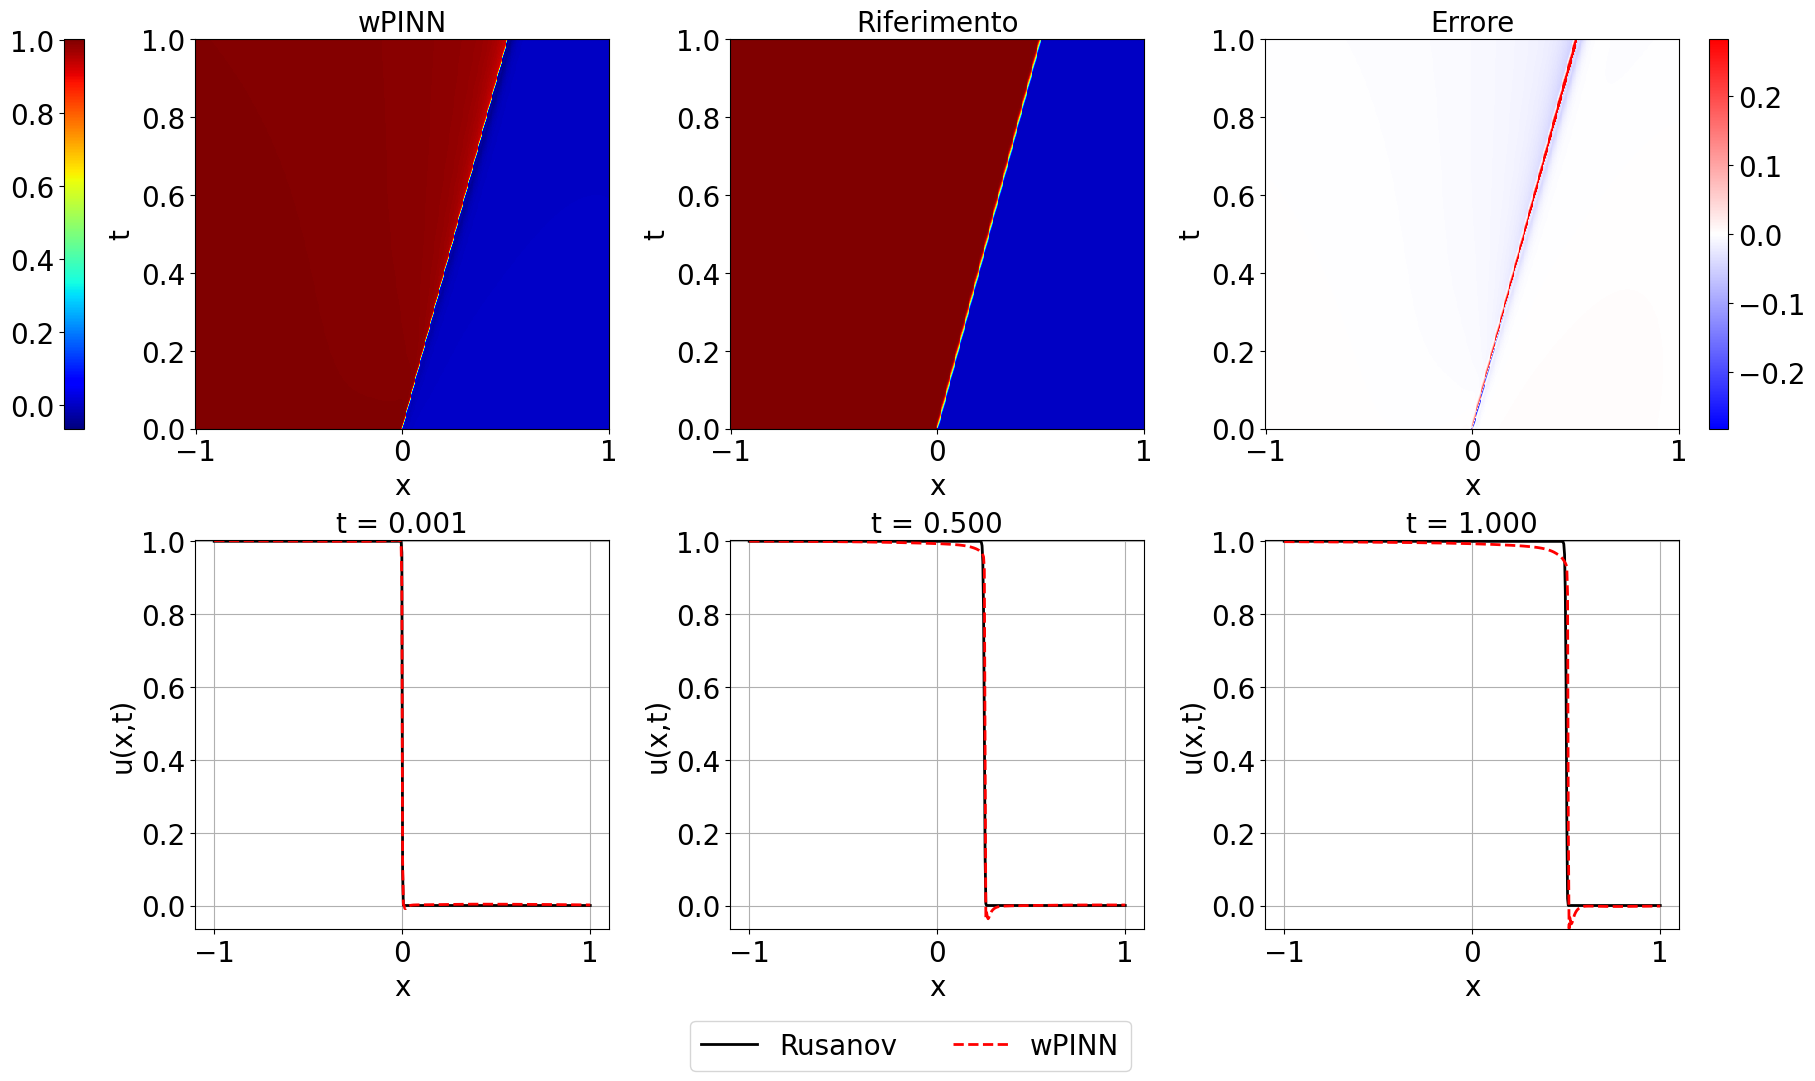

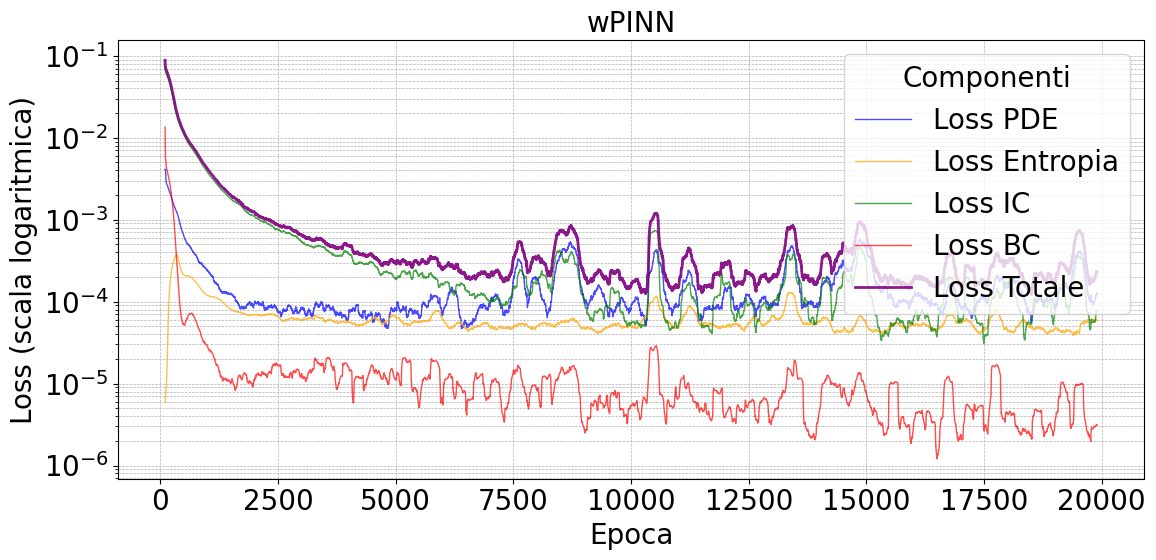


Metriche di Errore L2
---------------------
Errore L2 assoluto            : 4.402173e-02
Errore L2 relativo            : 3.937243e-02



In [18]:
w_inburgers_2.plot_comparison()
w_inburgers_2.plot_losses()
w_inburgers_2.l2_error()